## Optimal Market Share Strategy in Markets with Positive Feedbacks

### Sam Leathers, Bosco De Enrique Romeu

#### Abstract

Market share strategy has been a widely studied topic within business, with the hopes of optimizing the strategy employed by firms. We will be contrasting a strategy which focuses on being the first mover and building up a user base first Vs. a strategy which involves spending more resources creating a higher quality product which will get the product recommended more often. Throughout this project, we will test our ideas using a Polya urn model. We will show that the optimal strategy varies with feedback variability, predominantly taken to be social influences and the implications for the evolution of market share, and the timeline over which returns are expected.   

#### Introduction
Positive feedbacks within networks involve self-reinforcing mechanisms which allow for the positive evolution of the network to be driven by the current state of the network. The positive feedback is considered positive, because it increases the growth of the network and at each step is growing the system by its' nature. There are many forms of positive feedbacks, not limited to social learning, learning curves, and brand loyalty, but for this project we will simply focus on the impact of current market share and quality of the product.

Let us take a simple example to start with, where we will only focus on one form of feedback and tie it into the model we wish to use. Many forms of feedback can fall into what we will consider the current market share of the system, which will be our feedback with our simple system. Take for instance the water heater market, within the water heater market when a new water heater is purchased for a home, it is highly likely to be the same brand as the previous heater, as all of the fittings will work and make for an easy install. Further, for the builders who construct homes, they are likely to stick to a certain brand for simplicity since they will not need to redo all of their designing work each time. 

We will define Polya's urn and then tie it into our market dynamics next. For our simple urn model, imagine that we have red and green marbles in a container. At each time step, we will randomly choose a marble in our urn and add another marble of the same color. This gives us a system which evolves soley based on what could be considered the current market share of the system. 

#### Polya's Urn
Let $X$ be a Markov Chain which tracks the evolution of our urn model. Let us say for N marbles, R = # of red marbles, G = # of green marbles, N = R + G. X = R (X tracks the balls which are red). 

Our transition probabilities can be given by the following: 
\begin{equation}
  X=\left\{
  \begin{array}{@{}ll@{}}
    X, & \text{Selecting a Green Marble to add wp:} prob = \frac{G}{N} \\
    X + 1 & \text{Selecting a Red Marble to add wp:} prob = \frac{R}{N}
  \end{array}\right.
\end{equation} 

Where we can see that our system evolves soley based on the current state of the system. Under this simple model there are a couple important dynamics to point out. First, for any number of companies (marble colors), if the initial market presence are all equal, as the system evolves any collection of market shares that sum to 1 is equally likely (a uniform distribution). Two, having a higher starting market share smoothly transforms the long term probability distribution to favor the company with the initial larger share, but given equal feedback or feedback proportional only to market presence there is always some small chance that any market share is possible.

Note: for any number of companies, we can track 1 and treat all other companies as the sum of their share, effectively creating a system with two types. 

Below I will empirically show the results mentioned above by simulating this urn model many times and showing the results appear to create a uniform distribution for the ending market share.

In [11]:
# reference code adapted from: https://michaelbigelow.com/post/polya-urn-simulation/

import numpy as np
from numpy import random
import matplotlib.pyplot as plt

class Urn:
    def __init__(self, red=1, green=1):
        self.red = red
        self.green = green

    def draw(self):
        balls = self.red + self.green
        prob_dist = [self.red / balls, self.green / balls]
        result = random.choice(["red", "green"], p=prob_dist)
        return result

    def update(self):
        draw = self.draw()
        if draw == "red":
            self.red += 1
        elif draw == "green":
            self.green += 1
            
def polyas_urn(num_draws1=998, num_trials=100):
    """
    Function for running experiments on the Polya Urn model
    """
    trials1 = np.zeros(num_trials)
    for j in range(num_trials):
        urn = Urn()
        for i in range(num_draws1):
            urn.update() # update for number of draws
        trials1[j] = urn.red / num_draws1 # give portion at end of draws
    return trials1



#### Result 1, assuming equal starting market share all ending states are equally likely. 

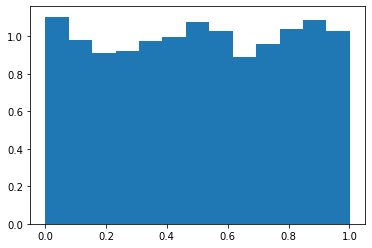

In [15]:
distribution = polyas_urn(num_trials = 2000)
plt.hist(distribution, bins = 'auto', density = True)
plt.show()

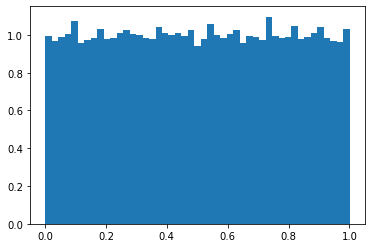

In [16]:
distro = polyas_urn(num_trials = 100000) # many more trials (don't try and run this cell again!)
plt.hist(distro, bins = 'auto', density = True)
plt.show() # can see it approaches uniform density with more trials

#### Result 2, regardless of starting condition, all ending states have some positive probability of occuring

Note: if we start with 0, under this convention we will never gain any market share hence for any starting condition not equal to zero, all ending states have some positive probability of occuring. (Not including zeros, no firm can go to zero but it can approach zero)

I will attempt to show this by creating a function which will vary the initial conditions and show the distribution of the resulting market share as above, only this time they should not be uniform and should smoothly increase as the initial share increases. 

In [19]:
def polyas_urn2(num_draws1=998, num_trials=1000, red = 1, green = 1):
    """
    Function for running experiments on the Polya Urn model
    """
    trials1 = np.zeros(num_trials)
    trials2 = np.zeros(num_trials)
    
    # increase the number of red 
    for j in range(num_trials):
        urn = Urn(red = red)
        for i in range(num_draws1):
            urn.update() # update for number of draws
        trials1[j] = urn.red / (urn.red + urn.green) # give portion at end of draws
    
    # again but increase the starting number of green balls and leave red static
    for j in range(num_trials):
        urn = Urn(green = green)
        for i in range(num_draws1):
            urn.update()
        trials2[j] = urn.red / (urn.red + urn.green)
    return trials1, trials2
    

In [21]:
# Want to iterate through and create skewed initial conditions
distro1, distro2 = polyas_urn2(red = 2, green = 2)
distro3, distro4 = polyas_urn2(red = 3, green = 3)
distro5, distro6 = polyas_urn2(red = 4, green = 4)

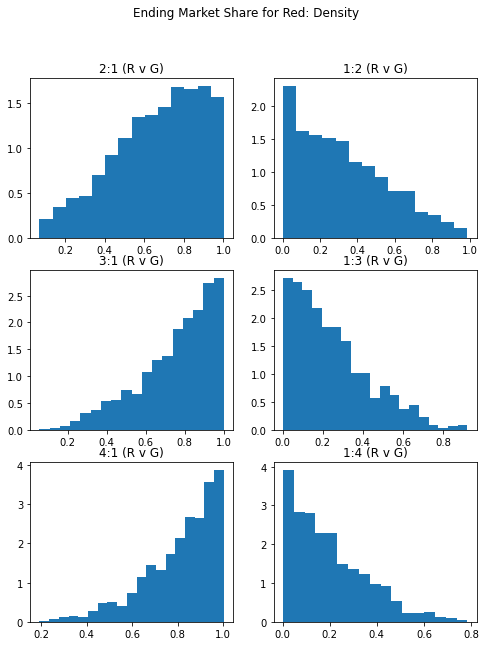

In [36]:
plt.figure(figsize = (8,10)).suptitle('Ending Market Share for Red: Density')
plt.subplot(3,2,1)
plt.hist(distro1, bins = 'auto', density = True)
plt.title('2:1 (R v G)')

plt.subplot(3,2,2)
plt.hist(distro2, bins = 'auto', density = True)
plt.title('1:2 (R v G)')

plt.subplot(3,2,3)
plt.hist(distro3, bins = 'auto', density = True)
plt.title('3:1 (R v G)')

plt.subplot(3,2,4)
plt.hist(distro4, bins = 'auto', density = True)
plt.title('1:3 (R v G)')

plt.subplot(3,2,5)
plt.hist(distro5, bins = 'auto', density = True)
plt.title('4:1 (R v G)')

plt.subplot(3,2,6)
plt.hist(distro6, bins = 'auto', density = True)
plt.title('1:4 (R v G)')


plt.show()

Thus from the above we can see that the initial conditions smoothly effect the outcome of the distribution, however, all states still have positive finite probability. For instance, in the bottome left panel for 4:1 R v G (80% red starting), we see that an ending share of less than 20% is unlikely but possible. 

Thus from the results above we can see that no level of initial advantage guarantees a winner-takes-all outcome evolution of market share given equal feedbacks. However, given variable feedback the system will evolve in a winner-takes-all outcome given enough time, which we will show next.

### Feedback from Quality

Next, allow us to consider a market dynamic such that exceptional products are purchased more, and grow share more rapidly, based on their quality not only their current market share. In the real world we see competitive markets like this all the time, a new competitor can consume most of the market share as can be witnessed by Facebook social media and the Google Chrome web browser below. Note however, the length of time until market dominance, this will be a key factor in future analysis.  

<img src="SM.png" width="500"/>
<img src="BOS.png" width="500"/>

Hence from the evolution of markets above, we can see the need to incorporate a quality factor to rework our model to simulate the real world environment. This quality factor will be approximated by a single static score for each company. First, I will create this new model and then show the evolution of systems comparing companies of different quality with different starting market shares. This will hopefully lead to an intuition as to which strategy should be focused on by which firms.  

### Polya's Urn Model: with quality score to represent positive feedbacks through quality

### Market Urn selection process 
In the reference paper https://deepblue.lib.umich.edu/bitstream/handle/2027.42/142337/jems12231_am.pdf?sequence=2, they used a model which the quality factor would increase the number purchased or amount of marbles placed in at that turn once selected. We have elected to use a model which instead of changing the amount placed in the urn it will adjust the probability to be chosen during the next time step. We believe this reflects more of a one-off large purchase like a vehicle or laptop where reccomendations may carry more weight and affect which items are purchased not neccesarily lead to more purchasing outside of neccesity. The original model we believe would be better suited to more discretionary markets where demand can greatly be impacted by social feedbacks. We cautiously would like to note that our results may not match with those of the papers given the disparity. 

The formula we used is as follows:

For each company $X_i$ with quality score $Q_i$, the probability to be selected in our urn model is as follows assuming we have N companies
$$\frac{ X_i * Q_i}{\sum^N_{i=1}X_i*Q_i}$$

We would also like to note to replicate the model in the paper we would simply need to change our code such that the probabilities go back to standard 

$$\frac{X_i}{\sum^N_{i=1}X_i}$$

implemented by changing our prob_dist = [(self.XX/self.TAM)] (updating self.TAM first) and when incrementing up in Market_update() we would simply need to use self.XX += XX_Q 

In [37]:
#Note: For the initial settings, I am using an approximation of Jan 2009 data from https://gs.statcounter.com/social-media-stats#monthly-200901-202111
# I will focus on 4 social medias: FaceBook, Reddit, Twitter, Pinterest. 
# Noting that pinterest did not gain any share until 2012, we will simply assign it a proportionally small base/perhaps should start RW at 2012?

class SM_Urn:
    def __init__(self, FB = 25, FB_Q = 10, RDDT = 10, RDDT_Q = 1, TWTR = 8, TWTR_Q = 5, PIN = 1, PIN_Q = 7):
        self.FB = FB
        self.RDDT = RDDT
        self.TWTR = TWTR
        self.PIN = PIN
        
        # quality scores: Q is a weight to be applied to our probability distribution (ALL APPROXIMATIONS FOR NOW)
        # Probability FB to be drawn is no longer FB/TAM but should be (FB*Q)/TAM_Q
        # Q can be thought of as a metric tracking the positive feedback given by users/ its' effect on which service new users choose based on number of users and Q
        self.FB_Q = FB_Q
        self.RDDT_Q = RDDT_Q
        self.TWTR_Q = TWTR_Q
        self.PIN_Q = PIN_Q
        
        #DEFINE TAM as Urn feature (TAM = Total addressable Market)
        self.TAM = self.FB + self.RDDT + self.TWTR + self.PIN
        
    # update function to be used if we want to modulate Q score at various thresholds (lowers at 90% etc due to some market effect)
    # needs to call specific Q and set self.XXX_Q = new_Val
    #def Q_update(self):
        
    def Market_Draw(self):
        #TAM = self.FB + self.RDDT + self.TWTR + self.PIN # 
        # TAM Normalized with Q for prob_dist
        TAM_Q = self.FB * self.FB_Q + self.RDDT * self.RDDT_Q + self.TWTR*self.TWTR_Q + self.PIN*self.PIN_Q
        
        prob_dist = [(self.FB*self.FB_Q)/TAM_Q, (self.RDDT * self.RDDT_Q)/TAM_Q, (self.TWTR*self.TWTR_Q)/TAM_Q, (self.PIN*self.PIN_Q)/TAM_Q]
        result = random.choice(["FB","RDDT","TWTR","PIN"], p = prob_dist)
        return result
    
    def Market_Update(self):
        draw = self.Market_Draw()
        # TAM should always increment on update
        self.TAM += 1
        
        if draw == 'FB':
            self.FB += 1
        elif draw == 'RDDT':
            self.RDDT += 1
        elif draw == 'TWTR':
            self.TWTR += 1
        elif draw == 'PIN':
            self.PIN += 1
        else:
            print("How is Market_Draw any other value")

In [317]:
# function to evolve system/Track FB social media market share (The dominant player with nearly 90% share at one point in time)
def Market_Urn(num_draws = 1000, num_trials = 1000, FB = 25, FB_Q = 10, RDDT = 10, RDDT_Q = 1, TWTR = 8, TWTR_Q = 5, PIN = 1, PIN_Q = 7):
    """ 
    Function to Evolve our urn model with respect to Social media Market share
    """
    trial = np.zeros(num_trials)
    
    trial_steps_concat = []
    for j in range(num_trials):
        urn = SM_Urn(FB = FB, FB_Q = FB_Q, RDDT = RDDT, RDDT_Q = RDDT_Q, TWTR = TWTR, TWTR_Q = TWTR_Q, PIN = PIN, PIN_Q = PIN_Q) # initiliaze new urn for each trial
        trial_steps = np.zeros(num_draws) # new container to follow path, put into concat
        for i in range(num_draws):
            urn.Market_Update()
            trial_steps[i] = urn.FB/urn.TAM# give single level step evolution of FB proportion
        trial_steps_concat.append(trial_steps) # gives update for all steps corresponding to trial[j]
        trial[j] = urn.FB/urn.TAM # gives update to market share after num_draws is completed (end of chain)
        
    return trial, trial_steps_concat

# function to find walks we are interested in
# For SM, want FB to be around 75% at end (can adjust 'threshold' to find certain types of walk)
def finder(x,y,threshold = .9):
    idx = [i for i, v in enumerate(x) if v < threshold] # gives index values of walks we are interested in seeing
    # graph plots from y with corresponding indexes ( only interested in a few, may be more)
    if len(idx) >= 3: # check we have at least 3 (want to plot 3)
        fig, axs = plt.subplots(1,3)
        # loop through plots
        for i in range(3):
            axs[i].plot(y[idx[i]])
            
    elif len(idx) >= 1:
        plt.plot(y[idx[0]])
        
    else:
        return('No walk within threshold')
    return plt.show()

#### Let's iterate through our distribution by holding various levels of FB initial market share, and then for each share varying the quality score of FB

In [101]:
# equal starting share: vary quality
dis1, path1 = Market_Urn(FB = 1, FB_Q = 1, RDDT = 1, RDDT_Q = 1, TWTR = 1, TWTR_Q = 1, PIN = 1, PIN_Q = 1, num_trials = 100000) # increase number of trials to see we approach a uniform distro better
dis2, path2 = Market_Urn(FB = 1, FB_Q = 3, RDDT = 1, RDDT_Q = 1, TWTR = 1, TWTR_Q = 1, PIN = 1, PIN_Q = 1)
dis3, path4 = Market_Urn(FB = 1, FB_Q = 5, RDDT = 1, RDDT_Q = 1, TWTR = 1, TWTR_Q = 1, PIN = 1, PIN_Q = 1)
dis4, path4 = Market_Urn(FB = 1, FB_Q = 7, RDDT = 1, RDDT_Q = 1, TWTR = 1, TWTR_Q = 1, PIN = 1, PIN_Q = 1)


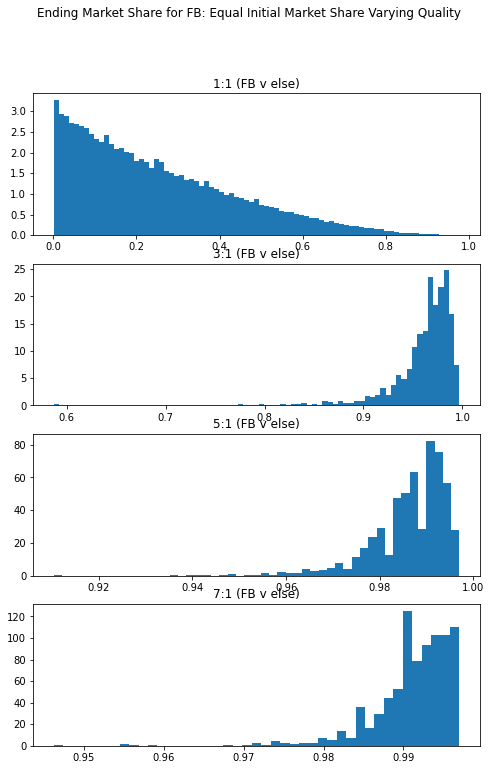

In [103]:
plt.figure(figsize = (8,12)).suptitle('Ending Market Share for FB: Equal Initial Market Share Varying Quality')
plt.subplot(4,1,1)
plt.hist(dis1, bins = 'auto', density = True)
plt.title('1:1 (FB v else)')

plt.subplot(4,1,2)
plt.hist(dis2, bins = 'auto', density = True)
plt.title('3:1 (FB v else)')

plt.subplot(4,1,3)
plt.hist(dis3, bins = 'auto', density = True)
plt.title('5:1 (FB v else)')

plt.subplot(4,1,4)
plt.hist(dis4, bins = 'auto', density = True)
plt.title('7:1 (FB v else)')


plt.show()

 I am not sure why the first graph above is not uniform.
 
 I will note that it looks like the 1:3 R v G above, however since it's 1:1:1:1 I was under the impression it should be uniform but looks like the sum of the others is affecting it more than I had initially thought.
 
 There are two competing theorems in my mind, one which is a Lemma which states we can treat the sum of all other competitors as a single entity assuming they have the same feedbacks, the other states
 that given equal starting share all ending states are equally like. We proved this with two companies of interest. The only conclusion I can draw is that equal starting share must be for the sum of all competitors.
 
 Noting that my conclusion is intuitive speculation and not rigorous, the difference in model set up (changing probability to be picked instead of how many new marbles are added after being picked) could easily be the root cause as to why we are not seeing the expected theoretical behavior.


In [46]:
# Low Market Share
dis5, path5 = Market_Urn(FB = 1, FB_Q = 1, RDDT = 3, RDDT_Q = 1, TWTR = 3, TWTR_Q = 1, PIN = 3, PIN_Q = 1)
dis6, path6 = Market_Urn(FB = 1, FB_Q = 3, RDDT = 3, RDDT_Q = 1, TWTR = 3, TWTR_Q = 1, PIN = 3, PIN_Q = 1)
dis7, path7 = Market_Urn(FB = 1, FB_Q = 5, RDDT = 3, RDDT_Q = 1, TWTR = 3, TWTR_Q = 1, PIN = 3, PIN_Q = 1)
dis8, path8 = Market_Urn(FB = 1, FB_Q = 7, RDDT = 3, RDDT_Q = 1, TWTR = 3, TWTR_Q = 1, PIN = 3, PIN_Q = 1)


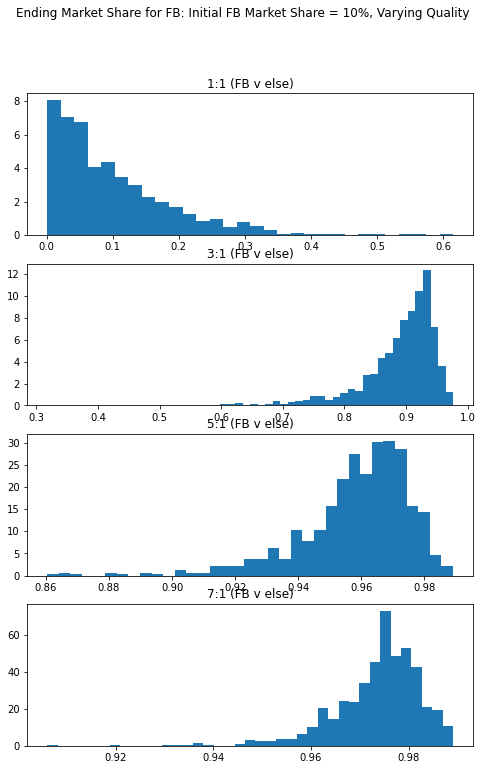

In [47]:
plt.figure(figsize = (8,12)).suptitle('Ending Market Share for FB: Initial FB Market Share = 10%, Varying Quality')
plt.subplot(4,1,1)
plt.hist(dis5, bins = 'auto', density = True)
plt.title('1:1 (FB v else)')

plt.subplot(4,1,2)
plt.hist(dis6, bins = 'auto', density = True)
plt.title('3:1 (FB v else)')

plt.subplot(4,1,3)
plt.hist(dis7, bins = 'auto', density = True)
plt.title('5:1 (FB v else)')

plt.subplot(4,1,4)
plt.hist(dis8, bins = 'auto', density = True)
plt.title('7:1 (FB v else)')


plt.show()

In [48]:
# Infitesimal Initial Market Share: vary quality
dis9, path9 = Market_Urn(FB = 1, FB_Q = 1, RDDT = 33, RDDT_Q = 1, TWTR = 33, TWTR_Q = 1, PIN = 33, PIN_Q = 1)
dis10, path10 = Market_Urn(FB = 1, FB_Q = 3, RDDT = 33, RDDT_Q = 1, TWTR = 33, TWTR_Q = 1, PIN = 33, PIN_Q = 1)
dis11, path11 = Market_Urn(FB = 1, FB_Q = 5, RDDT = 33, RDDT_Q = 1, TWTR = 33, TWTR_Q = 1, PIN = 33, PIN_Q = 1)
dis12, path12 = Market_Urn(FB = 1, FB_Q = 7, RDDT = 33, RDDT_Q = 1, TWTR = 33, TWTR_Q = 1, PIN = 3, PIN_Q = 1)


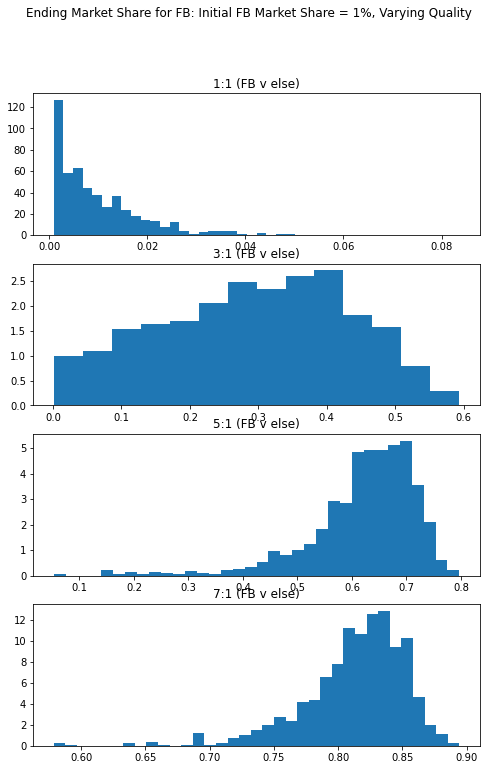

In [49]:
plt.figure(figsize = (8,12)).suptitle('Ending Market Share for FB: Initial FB Market Share = 1%, Varying Quality')
plt.subplot(4,1,1)
plt.hist(dis9, bins = 'auto', density = True)
plt.title('1:1 (FB v else)')

plt.subplot(4,1,2)
plt.hist(dis10, bins = 'auto', density = True)
plt.title('3:1 (FB v else)')

plt.subplot(4,1,3)
plt.hist(dis11, bins = 'auto', density = True)
plt.title('5:1 (FB v else)')

plt.subplot(4,1,4)
plt.hist(dis12, bins = 'auto', density = True)
plt.title('7:1 (FB v else)')


plt.show()

Hence from the above we can see that for even minute initial market share, as a system evolves the quality of the firm over powers the other form of feedback (market share) over a long enough time. 

**Theorem**: (Athreya, 1969)[Summarized loosely as follows] if a firms positive feedback is greater than another firm, as time approaches infiinity the firm with greater positive feedbacks market share will approach 1. 

Firms however, may not be interested in market share decades from now and instead may elect to focus on making returns for the next few  quarters. Given this seeming paradox to optimize strategy, allow me to write a function which will track the average number of steps in each of the market settings above, to reach some level of market share. 

In [76]:
def finderT(x,y,threshold = .5):
    idx = [i for i, v in enumerate(x) if v > threshold] # gives index values of walks we are interested in seeing
    
    time = [] # empty list to fill with values
    for i in range(len(idx)):
        # gives us first time step to go over threshold in walks that we know go over it
        time.append(next(j for j, val in enumerate(y[idx[i]]) if val > threshold))
    
    if len(time) > 0:
        
        avg = sum(time)/len(time)
    else:
        avg = 0 # place holder, may cause issues in future if averaging over many averages
   
    return time, avg

In [77]:
T9, avg9 = finderT(dis9, path9) # 1% share, 1:1 quality
T10, avg10 = finderT(dis10, path10) # 1% share, 3:1 quality
T11, avg11 = finderT(dis11, path11)
T12, avg12 = finderT(dis12, path12)

In [73]:
len(T9) # number of walks where we go over threshold

0

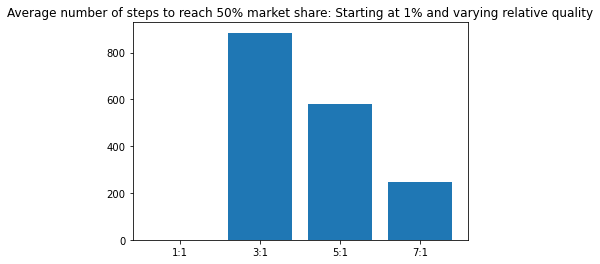

In [79]:
# average number of time steps taken to reach threshold - None implies threshold not reached
plt.bar(x = ['1:1', '3:1', '5:1', '7:1'], height = [avg9, avg10, avg11, avg12])
plt.title('Average number of steps to reach 50% market share: Starting at 1% and varying relative quality')
plt.show()

Where from the above we can conclude that the higher the relative quality the shorter the time until hitting target market share. It is important to clarify that not all markets will have a quality rating that allows for a 7:1 difference, in fact the smaller the range the more steps it will take. Noting 1:1 never hit the threshold with it's starting share of 1% market share.

Next I will write a function which is similiar but focuses on the portion of time steps above some threshold, so that for high initial market share we can track how long we can stay above some value on average. With this we should be able to start assigning profit values to market share values at each time step, and begin optimizing a market strategy.  


In [94]:
# update for number of steps above threshold portion Tp (time portion)

def finderTp(x,y,threshold = .5):
    
    time = [] # empty list to fill with values
    for i in range(len(y)):
        # Gives us portion of steps above threshold
        time.append(len([element for element in y[i] if element > threshold])/len(y[i]))
    
    # gives average portion over all 1k paths
    avg = sum(time)/len(time)
   
    return time, avg

In [97]:
Time, Tavg = finderTp(dis10, path10) # 1% initial market 3:1 quality

In [98]:
Tavg

0.006717999999999999

In [99]:
Time2, Tavg = finderTp(dis11, path11) # 1% initial, 5:1 quality

In [100]:
Tavg

0.37975600000000004

As can be witnessed above, as we increase our relative quality we not only get to our target threshold faster, but unsurprisingly stay above it longer as well. 

Next I will write a function which will simply sum up our market share at each step and find the average market share over a specified number of time steps. This function will be crucial in our optimization as we will use it for a proxy to profits. 

In [111]:
# function to give us the average of our market share by some specified time step
def Mshare(path,t = 1000):
    # t 1000 is defualt for urn, need code to prevent error if t is too big
    
    if t > len(path[0]):
        print('Index error, the walk does not have that many time steps')
    Mshare = None
    avgSharePerWalk = []
    # Check that 
    # need to get into individual paths from path
    for i in range(len(path)):
        Mshare = sum(path[i][:t]) # gives us paths up to t, sums up for each increment to that point
        avgSharePerWalk.append(Mshare/t) # gives us the average share on each walk
    
    # find the average market share for all paths
    avg = sum(avgSharePerWalk)/len(path) # gives us total sum, divided by number of paths
    
    return avgSharePerWalk, avg


In [116]:
per, avg = Mshare(path12)

In [117]:
avg # average market share for 7:1 advantage after 1000 steps starting at 1% initial share

0.6071938155895782

## Model Market Uncertainty

In order to account for the many uncertainties in business, we will create two random variables to mimic how much initial share is possible, and how much quality can range. Then we will create a a system where we will invest a certain percentage of resources into each, which will then linearly scale with the unkown range of the business environment. Noting that a baseline 25% market share and Q score of 1 regardless of any investment. We will simulate this many times to get an idea of which strategy is the most consistent over a given number of time steps. It is crucial to note that the values for these random variables we are going to create could be entire research subjects on their own and could focus on inidivual markets which are being looked at to invest in. These will be simple approximations to give a proof of concept. 

#### Initial Share
In order to attempt to replicate how much initial market share is up for grabs, we will need to consider that we are starting with 25% and are wanting to increase to roughly 70%. Given that we are using 4 competitors in total with an initial number of 'marbles', we will simply vary this by increasing the number for our company being tracked. Given this dynamic an initial increase of 6 will bring the total to 70%. We would like to sample from a discrete distribution which will be roughly bounded around [0,6] with some allowance for outliers, but will be centered around 2.5 such that we typically see between 50% and 57% as the max market share. We will do this by sampling from a normal RV N~(2.5,1) and then taking the absolute value and rounding that value to a discrete number.



In a real world setting this value would need to be studied and understood when approaching a market. We believe this to reflect roughly half of the market being able to be aggresively taken for the initial state of our model, but would like to reiterate that all firms start with a baseline 25% and do not compete against firms who can increase their intial share. Below is a histogram of the values being sampled for reference.  

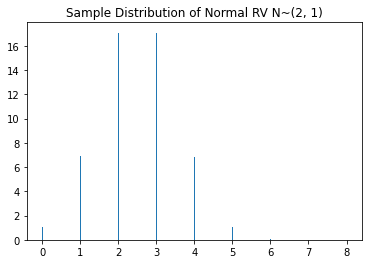

In [382]:
# NOTE: List comprehension to apply round(abs()) to every element of sample
plt.hist([round(abs(sample)) for sample in np.random.normal(2.5, 1, 1000000)], density = True, bins = 'auto')
plt.title('Sample Distribution of Normal RV N~(2, 1)')
plt.show()

Note that this has been skewed because have used the absolute value to slightly shift the distribution. 

## Quality Differential Range
In the real world the potential difference in quality and market influence is very hard to estimate. Given the dramatic results seen above, where for 1000 time steps, anything over a 3:1 quality difference had a distribution centered nearing complete market share, we will center our distribution for this at .5 with variance such that it can be 1-2 roughly total. Noting that a baseline of 1 is always needed for the model, our random variable will follow the absolute value of a normal distribution and will be centered at .5 and variance .18 which will be in addition to our baseline 1. Distribution visualized below. 

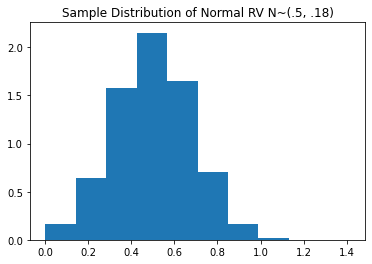

In [376]:
plt.hist([abs(sample) for sample in np.random.normal(.5, .18, 1000000)], density = True)
plt.title('Sample Distribution of Normal RV N~(.5, .18)')
plt.show()

Thus from the above we can see that our quality range will vary roughly from 1.5-2.5 with some edge cases. This will allow us to approximate each time step to real world time, which we will arbitrarily state as 1000 steps for a year.  

### Median Share Varying Quality and Initial Market Share Disadvantage

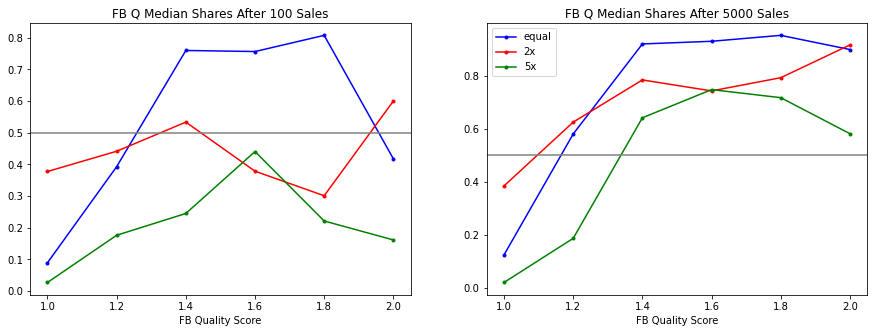

In [439]:
urns = {1:[], 2:[], 5:[]}
qf_increment = [0, .2, .4, .6, .8, 1]
for key in urns.keys():
    for qf in qf_increment:
        temp = Market_Urn(FB = 1, FB_Q = 1+qf,
                                 RDDT = 1*key, RDDT_Q = 1,
                                 TWTR = 1, TWTR_Q = 1,
                                 PIN = 1, PIN_Q = 1,
                               num_trials = 1000,
                               num_draws = 5000) # will increment such that we go over 5000 steps (5 years) and increment up how much share the competitors have
        urns[key].append(temp[1][0])# we don't care about the final market share but about the
     # entire path
    # note if we specified more trials, and used num_draws for ending points we could get summary statistics with the just the ending points which would likely be better.

fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)
# first plot we take the median of the first 100 values (100 sales)
axs[0].plot(np.arange(1,2.1,0.2),
         [np.median(x[0:100]) for x in urns[1]], 'b.-',
         label='equal')
axs[0].plot(np.arange(1,2.1,0.2),
         [np.median(x[0:100]) for x in urns[2]], 'r.-',
         label='2x')
axs[0].plot(np.arange(1,2.1,0.2),
         [np.median(x[0:100]) for x in urns[5]], 'g.-',
         label='5x')
axs[0].axhline(y=0.5, color = 'grey')
axs[0].set_title('FB Q Median Shares After 100 Sales')
axs[0].set_xlabel('FB Quality Score')
# second plot we take the median of the whole path (10 000 sales)
axs[1].plot(np.arange(1,2.1,0.2),
         [np.median(x) for x in urns[1]], 'b.-',
         label='equal')
axs[1].plot(np.arange(1,2.1,0.2),
         [np.median(x) for x in urns[2]], 'r.-',
         label='2x')
axs[1].plot(np.arange(1,2.1,0.2),
         [np.median(x) for x in urns[5]], 'g.-',
         label='5x')
axs[1].axhline(y=0.5, color = 'grey')
axs[1].set_title('FB Q Median Shares After 5000 Sales')
axs[1].set_xlabel('FB Quality Score')
axs[1].legend(loc='best')
plt.show()

In the figure above we see that when the competitors have an advantage in initial market share, as our system evolves over many time steps, the higher the quality of FB the faster it reaches market dominance regardless of initial disadvantage. For the data points where FB has a lower quality score, we can see that the market share is lower on average but quickly comes to dominate the system as quality improves, regardless of the inital advantage seen by the competing firms in terms of initial market presence. For our first 100 steps, even for maximum quality of 2, we can see that against a large disadvantage in terms of initial market share the dominating feature accross all FB quality scores is simply the initial market presence. After 5000 sales we can see that the initial disadvantage almost disappears entirely and we begin converging on total market dominance with a quality score of 2. 

Note: I am using FB as an arbitrary filler variable for the company of interest being tracked. It is simply a convention that tracks with the code being used. 
Additionally there is in error with respect to competing firms initial share. The fractions for intial share of FB are as follows for [equal, 2x, 5x] $\Rightarrow$ [1/4, 1/5, 1/8] and roughly match the desired outputs. 

### Experiment Design

We would like to assess a fast market share strategy with a quality product strategy in terms of aggregate market share over specified time intervals of 5-1 years. Given the random variables above we will allow for an investment scheme such that the fraction of resources dedicated to either will be proportionally added to our baseline values mentioned above. This we hope will verify that initial share will work best over shorter time periods, but the length of the time period will be a function of the expected quality range and variance. 

We shall simulate this by adapting our market urn above but modulate the inititial market share and quality score of the firm we are interested in. We will use a simple for loop to sample between 0 and 100 in 10 percent intervals to visualize what different levels of investment in either amount to in terms of average market share over several years. In order to discretize our initial market share given a portion of investment, we will simply use the math package ceil function to round the number up to avoid a negative bias on the market share potential.  

Note that a year equates to 1000 time steps in our process arbitrarily. 

In [388]:
def Market_Urn_Uncertain(num_draws = 5000, num_trials = 1000, FB = 1 , FB_Q = 1 , RDDT = 1, RDDT_Q = 1, TWTR = 1, TWTR_Q = 1, PIN = 1, PIN_Q = 1, m = 1, q = 1):
    """ 
    Function to Evolve our urn model with respect to Social media Market share.
    Will default to values of 1, with 5k time steps. For each trial we will create random variables to denote total market share and quality up for grabs 
    """
    # note: defaults to full investment in both, need to be specified
    
    trial = np.zeros(num_trials)
    
    trial_steps_concat = []
    for j in range(num_trials):
        # will place new random variable for each trial, will create proportion of investment with input m,q score
        urn = SM_Urn(FB = FB + math.ceil(m * round(abs(np.random.normal(2.5, 1)))) , FB_Q = FB_Q  + abs(q*np.random.normal(.5, .18)), RDDT = RDDT, RDDT_Q = RDDT_Q, TWTR = TWTR, TWTR_Q = TWTR_Q, PIN = PIN, PIN_Q = PIN_Q) # initiliaze new urn for each trial
        trial_steps = np.zeros(num_draws) # new container to follow path, put into concat
        for i in range(num_draws):
            urn.Market_Update()
            trial_steps[i] = urn.FB/urn.TAM# give single level step evolution of FB proportion
        trial_steps_concat.append(trial_steps) # gives update for all steps corresponding to trial[j]
        trial[j] = urn.FB/urn.TAM # gives update to market share after num_draws is completed (end of chain)
        
    return trial, trial_steps_concat

In [389]:
# we want to do 1000 experiments, 5000 time steps for each fraction: 0 10 20 30 40 50 60 70 80 90 100 % of investment
# Note the default number of trials for each is 1000
# need lists to keep track
import math

# 11 index spaces for the investment percentages above
distrobutions = [0,0,0,0,0,0,0,0,0,0,0] # only good for summary statistics of the ending state
paths = [0,0,0,0,0,0,0,0,0,0,0] # brackets allow us to nest the lists\ variable for complete path of each iteration (5000 draws 1000 times for reach investment scheme)

for i in range(11):
    m = i*.1 # M will be 0, .1, .2 .... to reflect desired percentages of investment in starting market share
    q = 1 - i*.1
    
    distrobutions[i], paths[i] = Market_Urn_Uncertain(m=m, q = q)# the rest of the defaults have been set as we desired for our experimental setup, see function above for initial conditions.

    
# Note: distrobutions[0][0] is for the path paths[0][0] and corresponds to 0 investment in market share

In [418]:
# want to write function to iterate through and summarize the aggregate market share by each year point

#Mshare averages, each index with correspond with average share over 1 year
# nested such that Mavg[0] will correspond with 1 year, Mavg[0][0] will be 1 year average share for 0 investment in initial market share
Mavg = [[0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0]]


for j in range(5):
    # j is iterator for number of steps tracked
    for i in range(11):
        # per is just dummy variable being overwritten
        # i is index for investment levels nested inside of each container for specified time
        per, Mavg[j][i] = Mshare(paths[i], t = 100* (j+1))
    



# Mavg[4] # Index zero is max q, the end index is max market, index 4 corresponds with 5 years, [4]][0] is max q investment after 5 years.

# Mavg[0] # index 0 is for '1 year' evolution

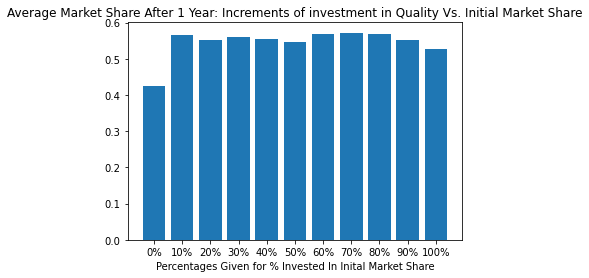

In [436]:
plt.bar(x = ['0%', '10%', '20%','30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'], height = Mavg[0])
plt.title('Average Market Share After 1 Year: Increments of investment in Quality Vs. Initial Market Share')
plt.xlabel('Percentages Given for % Invested In Inital Market Share')
plt.show() # note in the below that 0 corresponds with 0 investment in market share (the complement is the amount of investment in quality)

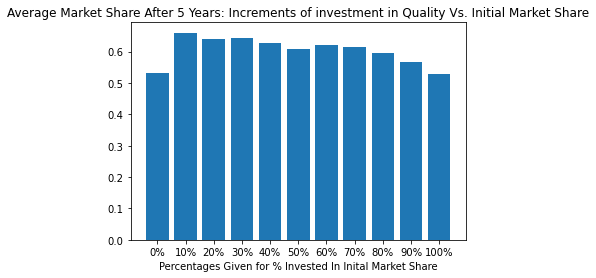

In [437]:
plt.bar(x = ['0%', '10%', '20%','30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'], height = Mavg[4])
plt.title('Average Market Share After 5 Years: Increments of investment in Quality Vs. Initial Market Share')
plt.xlabel('Percentages Given for % Invested In Inital Market Share')

plt.show() # note in the below that 0 corresponds with 0 investment in market share

### Results
Hence from the above we can see that the difference for simulated 1 year and 5 year is fairly simliar. This implies our time scale could be off, but also indicates the strength of investment into market share even over longer periods of time given variability in feedbacks. In both time frames, the model which performed the best most consistently corresponds to 90% invested into quality and 10% into initial market share. Given the set up of our random variables, this likely has to do with how rounding occurred and the distributions chosen to sample from for our random variables. Quality should win out given any significant amount of time, and perhaps 1000 time steps which we used as our baseline year arbitrarily is too many to see the results we are seeking. 

Over our simlulated one year point we see that max investment into quality, seen by 0% investment into market share (on the x axis), has the least market share on average which is what we would hope to see. This initial graph for one year is a bit worrying as it puts into question some of our assumptions. We would expect max market share to be the best investment scheme denoted by 100% over our shorter interval, but have to note that while very close many of the combination investment schemes outperformed for our simulated shorter time frame. Further analysis should be done pertaining to shorter time periods and at which number of steps do we see significant trend changes. 

Unfortunately this is also the case over our simulated five year point which is the opposite of what we would expect to see as the system evolves longer. Max investment in quality should converge to market dominance after long enough, however for whatever reason our max quality investment appears to be the worst. Fortunately for our expectation, the second graph for 5 years follows the trend fairly smoothly that we would expect with the exception of full investment in quality (As we increment more investment into market share the average share smoothly goes down). We believe this to indicate some kind of critical flaw in our experiment set up to deal with boundary conditions of investment, particularly when it comes to 0 investment into market share and the impact of rounding up for even 10% investment into market share or perhaps the use of 90% of our q score is roughly equivalent to 100% given the variance. The issue could also be the summing method used for each time step of market share to find an average, starting at a much higher share could simply average higher over shorter periods. Whatever the reason, our intuition of what was expected is directly being challenged by what appears to be one outlier (0% investment in market share) in the set up of our experiment. Additionally, adding more time steps should further pronounce the affect that quality has, but I believe the muted affect to be directly related to the variance in the potential quality scores.

These results hint at what we were hoping to show, namely that for systems with feedback variability investing in more consistent forms of feed back (initial market share) has a longer tail for market dominance, with respect to the expected distribution as the system evolves for a given time, than may be obvious intuitively. That is to say that while given enough time guarantees the firm with higher feedbacks will dominate the market, the timeline on which this takes place is critical for which investment scheme we expect to hold the most aggregate market share on average over any given timeline. Additionally, the variance in feedbacks is directly related to how much time we expect it to take on average to reach the point where a quality strategy wins out. 

In practical terms this implies that investment is best put into places where the impact is consistent and known. Driving down costs, aggressive marketing and other forms of positive feedbacks should likely get priority in investment given high uncertainty around quality feedbacks. In essense, if we were to attempt to use this model to assess an investment strategy into a new market we would see that the distributions of our random variables would be the deciding factor for any given time interval. Specifically the feedback variability with quality and the range to which the quality of the product could be greater than a competitor's. Note that we showed how a system evolves previously for 3:1 quality and greater, where it rapidly consumed the whole model and concentrated the distribution nearing market dominance. We wanted to avoid such dominant influence and elected to keep our quality score quite low for this experiment. In practice, defining these random variables to accurately reflect the desired market would be considered the real work as their accuracy would define the utility of the model. Additionally, having the overall highest feedback would be the goal, the way we have partitioned our feedbacks into two categories allows us to contrast the types of investment we were looking at, but in the real world we would be attempting to get the highest feedback with the lowest variance possible with respect to all forms of positive feedback. 